## 1. Import thư viện

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Đọc dữ liệu từ file csv


In [2]:
TRAIN_PATH = '../data/raw/aug_train.csv'

with open(TRAIN_PATH, 'r', encoding='utf-8') as f:
    header = f.readline().strip().split(',')
    print("Số cột:", len(header))
    print("Tên các cột:", header)

# Đọc dữ liệu (bỏ header)
data = np.genfromtxt(TRAIN_PATH, delimiter=',', dtype=str, skip_header=1)
print("Kích thước dữ liệu:", data.shape)  # (n_samples, n_features)

n_rows, n_cols = data.shape
print(f"Số dòng (mẫu): {n_rows}")
print(f"Số cột (đặc trưng): {n_cols}")


Số cột: 14
Tên các cột: ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']
Kích thước dữ liệu: (19158, 14)
Số dòng (mẫu): 19158
Số cột (đặc trưng): 14


## 3. Kiểm tra các cột có giá trị thiếu

In [3]:
def missing_rate(col):
    return np.mean((col == '') | (col == 'NaN') | (col == 'nan'))

print("\nTỶ LỆ GIÁ TRỊ THIẾU:")
for i, colname in enumerate(header):
    rate = missing_rate(data[:, i])
    if rate > 0:
        print(f"{colname:20s}: {rate*100:.2f}%")
    else:
        print(f"{colname:20s}: Không có missing")


TỶ LỆ GIÁ TRỊ THIẾU:
enrollee_id         : Không có missing
city                : Không có missing
city_development_index: Không có missing
gender              : 23.53%
relevent_experience : Không có missing
enrolled_university : 2.01%
education_level     : 2.40%
major_discipline    : 14.68%
experience          : 0.34%
company_size        : 30.99%
company_type        : 32.05%
last_new_job        : 2.21%
training_hours      : Không có missing
target              : Không có missing


## 4. Kiểm tra giá trị cột target

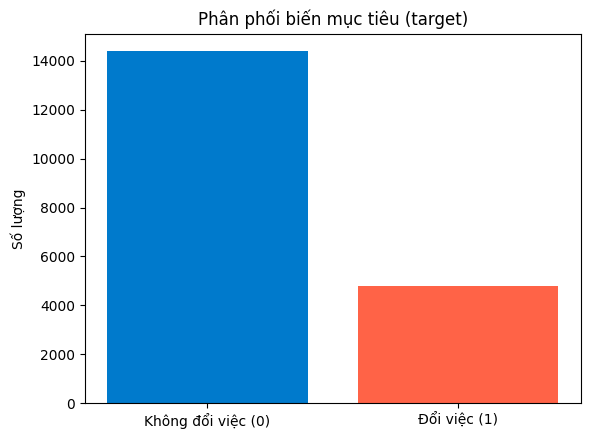

Tổng số = 19158
Giá trị 0: 14381 mẫu (75.07%)
Giá trị 1: 4777 mẫu (24.93%)


In [4]:
target_idx = header.index('target')
target = data[:, target_idx].astype(float).astype(int)

unique_vals, counts = np.unique(target, return_counts=True)
plt.bar(unique_vals, counts, color=['#007acc', '#ff6347'])
plt.xticks(unique_vals, ['Không đổi việc (0)', 'Đổi việc (1)'])
plt.ylabel("Số lượng")
plt.title("Phân phối biến mục tiêu (target)")
plt.show()

print(f"Tổng số = {len(target)}")
for val, cnt in zip(unique_vals, counts):
    print(f"Giá trị {val}: {cnt} mẫu ({cnt/len(target)*100:.2f}%)")


## Mô tả cho 1 số cột


>> experience
Mean: 10.11, Median: 9.00, Std: 6.76
Min: 0.50, Max: 21.00
Số giá trị missing: 65 (0.34%)


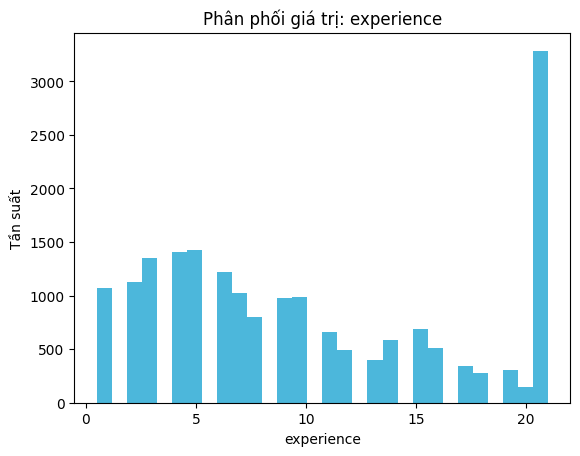


>> training_hours
Mean: 65.37, Median: 47.00, Std: 60.06
Min: 1.00, Max: 336.00
Số giá trị missing: 0 (0.00%)


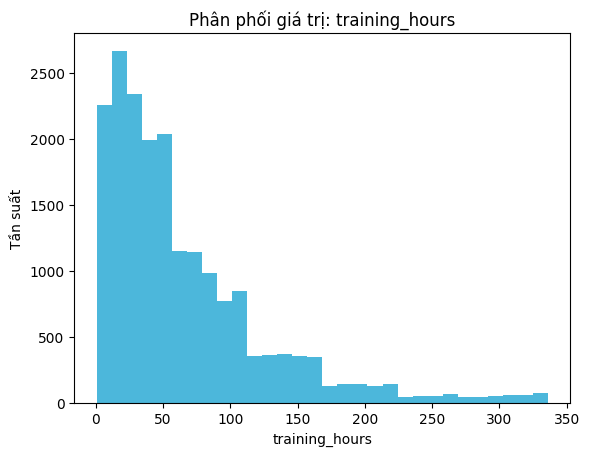

In [5]:
numeric_cols = ['experience', 'training_hours']
for colname in numeric_cols:
    idx = header.index(colname)
    col = data[:, idx].copy()
    
    if colname == 'experience':
        # Xử lý các giá trị đặc biệt của experience
        # Chuyển '>20' thành 21 (giả sử lớn hơn 20)
        col[col == '>20'] = '21'
        # Chuyển '<1' thành 0.5 (giả sử ít hơn 1)
        col[col == '<1'] = '0.5'
        # Chuyển 'never' thành 0
        col[col == 'never'] = '0'
    
    # Thay giá trị rỗng thành 'nan'
    col[col == ''] = 'nan'
    
    col_float = col.astype(float)
    
    # Tính toán thống kê
    mean = np.nanmean(col_float)
    median = np.nanmedian(col_float)
    std = np.nanstd(col_float)
    min_val = np.nanmin(col_float)
    max_val = np.nanmax(col_float)
    
    print(f"\n>> {colname}")
    print(f"Mean: {mean:.2f}, Median: {median:.2f}, Std: {std:.2f}")
    print(f"Min: {min_val:.2f}, Max: {max_val:.2f}")
    print(f"Số giá trị missing: {np.sum(np.isnan(col_float))} ({np.sum(np.isnan(col_float))/len(col_float)*100:.2f}%)")
    
    # Vẽ histogram
    valid_data = col_float[~np.isnan(col_float)]
    plt.hist(valid_data, bins=30, color='#0099cc', alpha=0.7)
    plt.title(f"Phân phối giá trị: {colname}")
    plt.xlabel(colname)
    plt.ylabel("Tần suất")
    plt.show()


## 5. Phân tích cột city_development_index


>> city_development_index
Mean: 0.8288
Median: 0.9030
Std: 0.1234
Min: 0.4480, Max: 0.9490
Q1: 0.7400, Q3: 0.9200


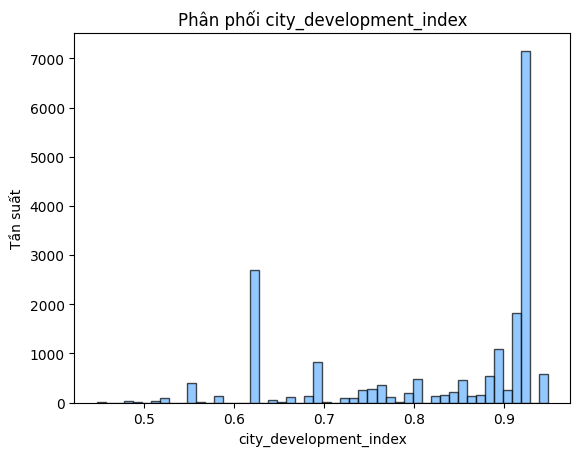

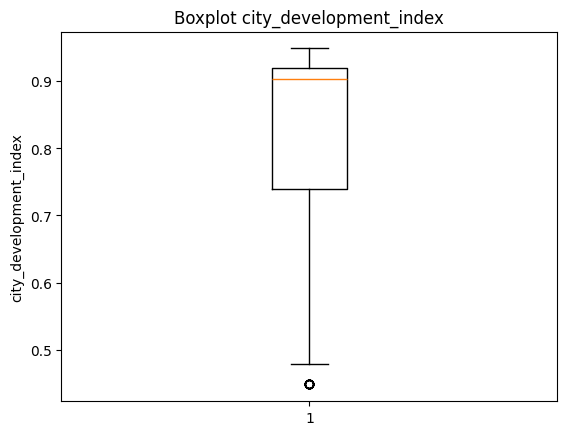

In [6]:
# Phân tích city_development_index
cdi_idx = header.index('city_development_index')
cdi = data[:, cdi_idx].astype(float)

print(">> city_development_index")
print(f"Mean: {np.mean(cdi):.4f}")
print(f"Median: {np.median(cdi):.4f}")
print(f"Std: {np.std(cdi):.4f}")
print(f"Min: {np.min(cdi):.4f}, Max: {np.max(cdi):.4f}")
print(f"Q1: {np.percentile(cdi, 25):.4f}, Q3: {np.percentile(cdi, 75):.4f}")

# Vẽ histogram
plt.hist(cdi, bins=50, color='#66b3ff', alpha=0.7, edgecolor='black')
plt.title("Phân phối city_development_index")
plt.xlabel("city_development_index")
plt.ylabel("Tần suất")
plt.show()

# Boxplot
plt.boxplot(cdi, vert=True)
plt.ylabel("city_development_index")
plt.title("Boxplot city_development_index")
plt.show()


## 6. Phân tích các cột categorical



>> gender
Số giá trị missing: 4508 (23.53%)
Phân phối giá trị:
  Male: 13221 (90.25%)
  Female: 1238 (8.45%)
  Other: 191 (1.30%)


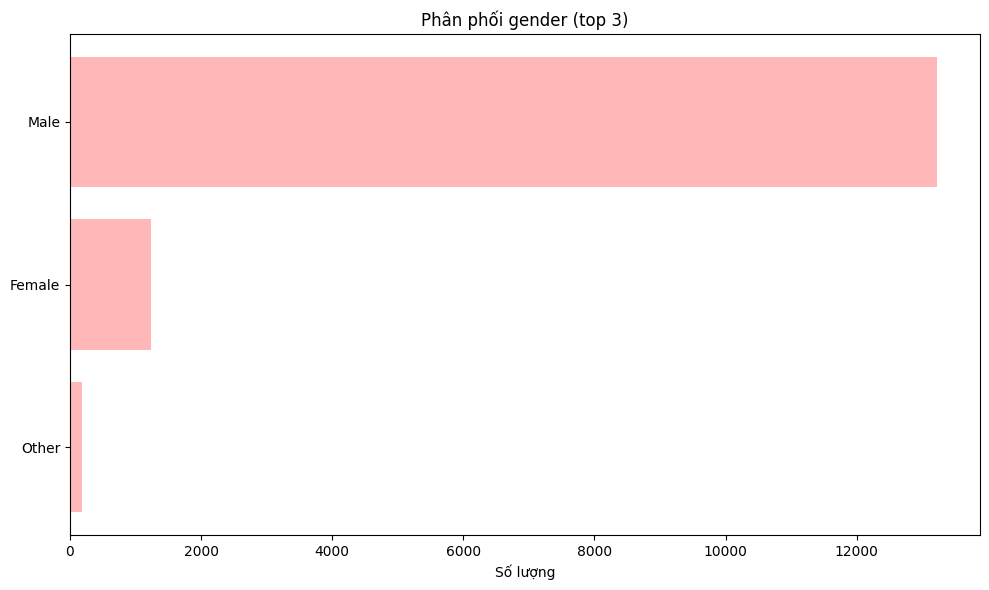


>> relevent_experience
Số giá trị missing: 0 (0.00%)
Phân phối giá trị:
  Has relevent experience: 13792 (71.99%)
  No relevent experience: 5366 (28.01%)


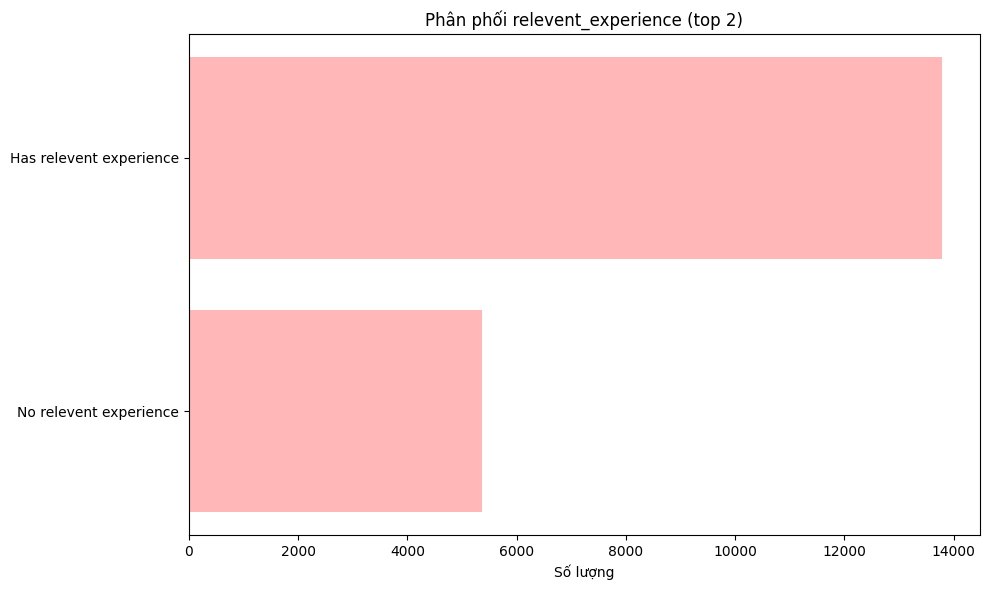


>> enrolled_university
Số giá trị missing: 386 (2.01%)
Phân phối giá trị:
  no_enrollment: 13817 (73.60%)
  Full time course: 3757 (20.01%)
  Part time course: 1198 (6.38%)


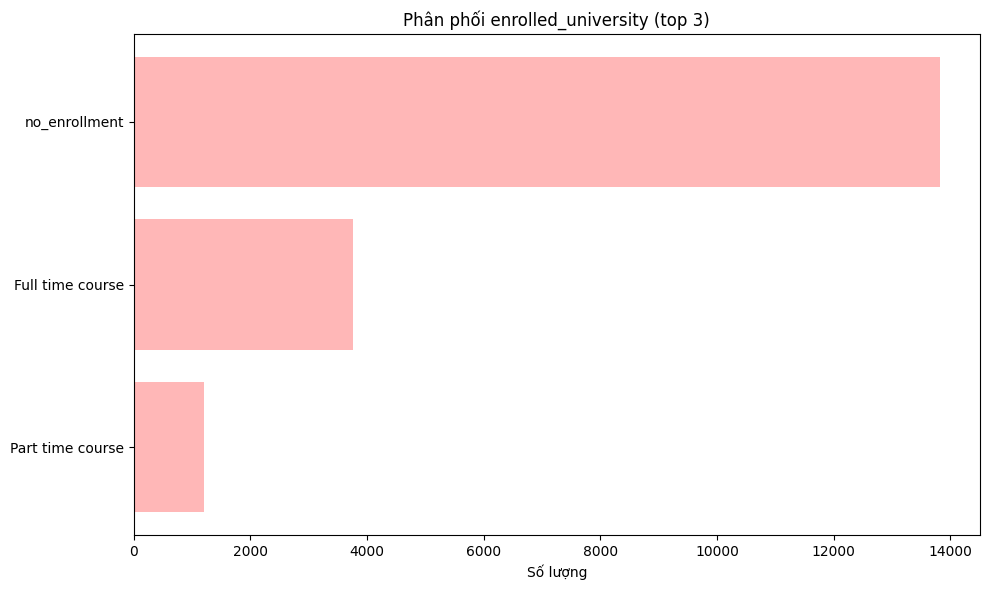


>> education_level
Số giá trị missing: 460 (2.40%)
Phân phối giá trị:
  Graduate: 11598 (62.03%)
  Masters: 4361 (23.32%)
  High School: 2017 (10.79%)
  Phd: 414 (2.21%)
  Primary School: 308 (1.65%)


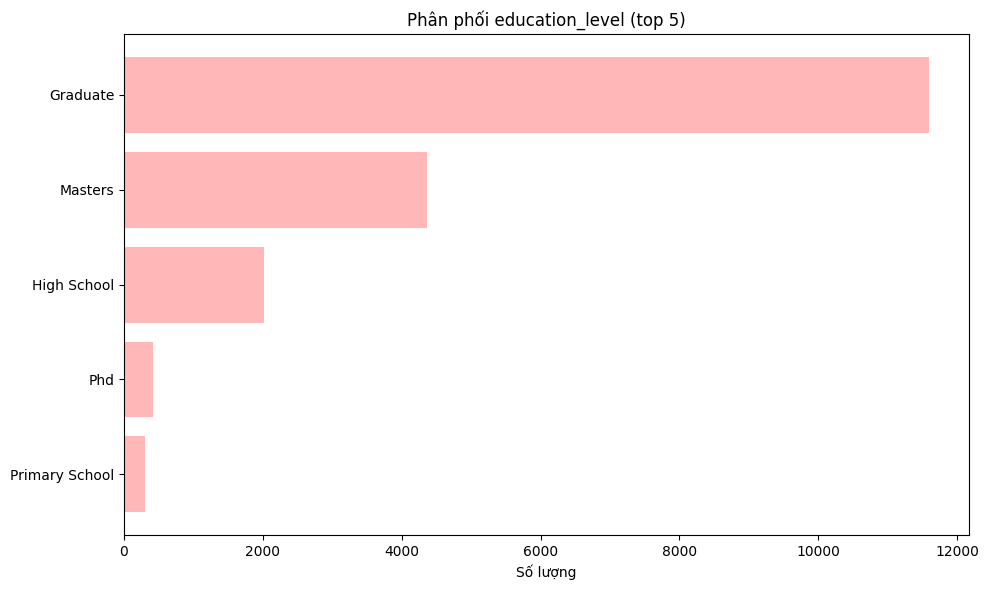


>> major_discipline
Số giá trị missing: 2813 (14.68%)
Phân phối giá trị:
  STEM: 14492 (88.66%)
  Humanities: 669 (4.09%)
  Other: 381 (2.33%)
  Business Degree: 327 (2.00%)
  Arts: 253 (1.55%)
  No Major: 223 (1.36%)


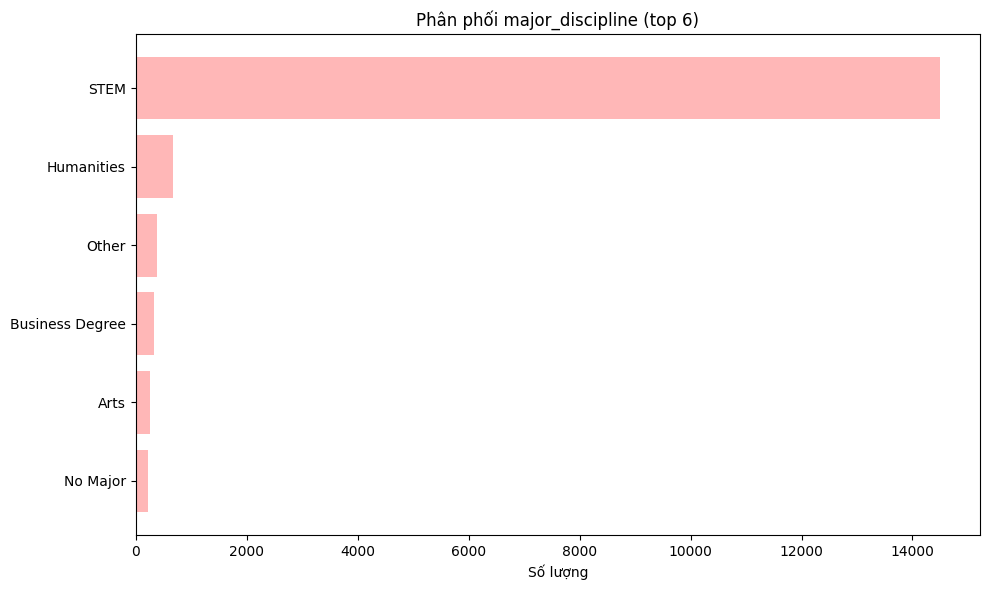


>> company_size
Số giá trị missing: 5938 (30.99%)
Phân phối giá trị:
  50-99: 3083 (23.32%)
  100-500: 2571 (19.45%)
  10000+: 2019 (15.27%)
  10/49: 1471 (11.13%)
  1000-4999: 1328 (10.05%)
  <10: 1308 (9.89%)
  500-999: 877 (6.63%)
  5000-9999: 563 (4.26%)


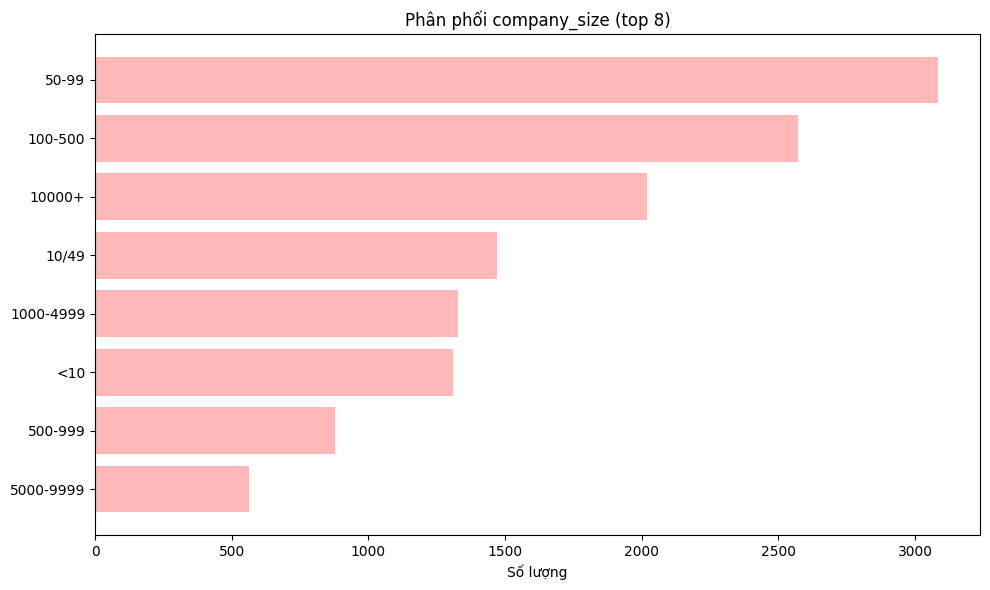


>> company_type
Số giá trị missing: 6140 (32.05%)
Phân phối giá trị:
  Pvt Ltd: 9817 (75.41%)
  Funded Startup: 1001 (7.69%)
  Public Sector: 955 (7.34%)
  Early Stage Startup: 603 (4.63%)
  NGO: 521 (4.00%)
  Other: 121 (0.93%)


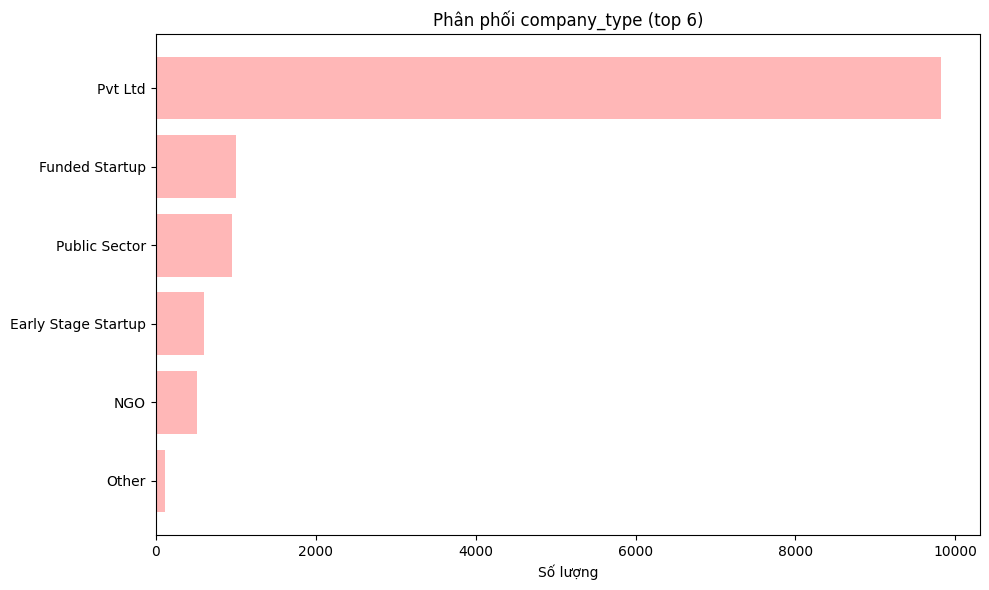


>> last_new_job
Số giá trị missing: 423 (2.21%)
Phân phối giá trị:
  1: 8040 (42.91%)
  >4: 3290 (17.56%)
  2: 2900 (15.48%)
  never: 2452 (13.09%)
  4: 1029 (5.49%)
  3: 1024 (5.47%)


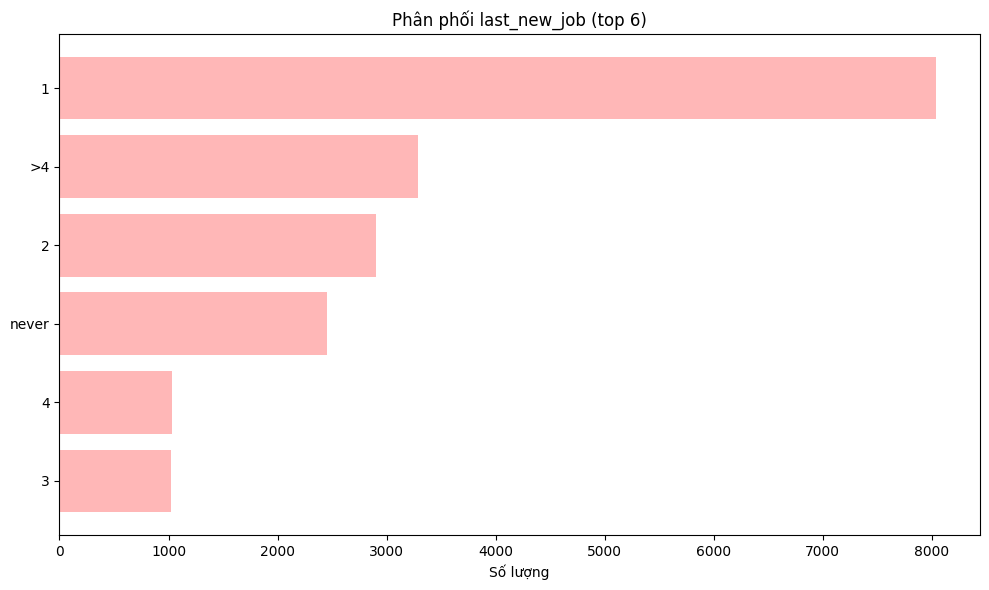

In [7]:
# Phân tích các cột categorical quan trọng
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university', 
                    'education_level', 'major_discipline', 'company_size', 
                    'company_type', 'last_new_job']

for colname in categorical_cols:
    idx = header.index(colname)
    col = data[:, idx]
    
    # Loại bỏ giá trị missing
    col_clean = col[col != '']
    
    # Đếm tần suất
    unique_vals, counts = np.unique(col_clean, return_counts=True)
    
    # Sắp xếp theo tần suất giảm dần
    sort_idx = np.argsort(-counts)
    unique_vals = unique_vals[sort_idx]
    counts = counts[sort_idx]
    
    print(f"\n>> {colname}")
    print(f"Số giá trị missing: {np.sum(col == '')} ({np.sum(col == '')/len(col)*100:.2f}%)")
    print(f"Phân phối giá trị:")
    for val, cnt in zip(unique_vals, counts):
        print(f"  {val}: {cnt} ({cnt/len(col_clean)*100:.2f}%)")
    
    # Vẽ bar chart cho top 10 giá trị
    top_n = min(10, len(unique_vals))
    plt.figure(figsize=(10, 6))
    plt.barh(unique_vals[:top_n][::-1], counts[:top_n][::-1], color='#ff9999', alpha=0.7)
    plt.xlabel("Số lượng")
    plt.title(f"Phân phối {colname} (top {top_n})")
    plt.tight_layout()
    plt.show()


## 7. Phân tích mối quan hệ giữa training_hours và target


>> So sánh training_hours giữa 2 nhóm target

Target = 0 (Không đổi việc):
  Mean: 66.11
  Median: 48.00
  Std: 60.94

Target = 1 (Đổi việc):
  Mean: 63.12
  Median: 46.00
  Std: 57.27


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23816\3948671451.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_target_0, training_target_1],


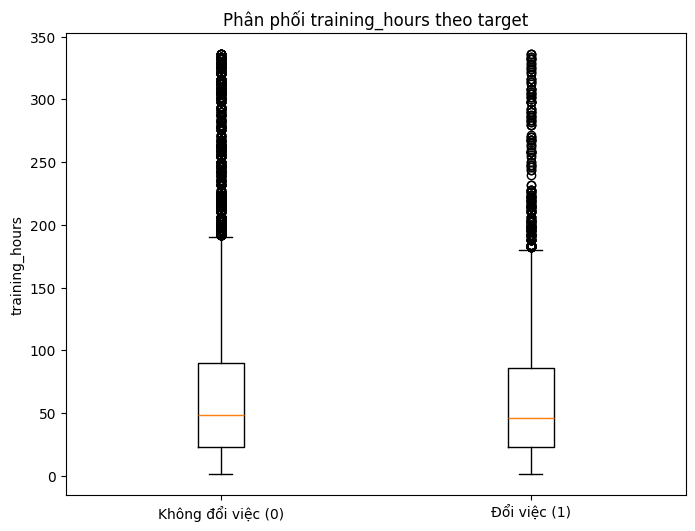

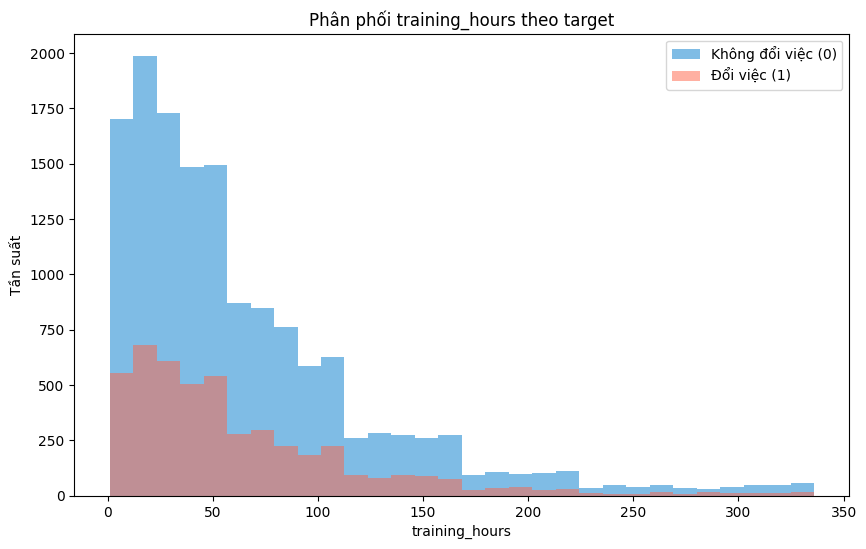

In [8]:
# So sánh training_hours giữa 2 nhóm target
target_idx = header.index('target')
training_idx = header.index('training_hours')

target_col = data[:, target_idx].astype(float).astype(int)
training_col = data[:, training_idx].astype(float)

# Phân chia theo target
training_target_0 = training_col[target_col == 0]
training_target_1 = training_col[target_col == 1]

print(">> So sánh training_hours giữa 2 nhóm target")
print(f"\nTarget = 0 (Không đổi việc):")
print(f"  Mean: {np.mean(training_target_0):.2f}")
print(f"  Median: {np.median(training_target_0):.2f}")
print(f"  Std: {np.std(training_target_0):.2f}")

print(f"\nTarget = 1 (Đổi việc):")
print(f"  Mean: {np.mean(training_target_1):.2f}")
print(f"  Median: {np.median(training_target_1):.2f}")
print(f"  Std: {np.std(training_target_1):.2f}")

# Vẽ boxplot so sánh
plt.figure(figsize=(8, 6))
plt.boxplot([training_target_0, training_target_1], 
            labels=['Không đổi việc (0)', 'Đổi việc (1)'])
plt.ylabel("training_hours")
plt.title("Phân phối training_hours theo target")
plt.show()

# Vẽ histogram so sánh
plt.figure(figsize=(10, 6))
plt.hist(training_target_0, bins=30, alpha=0.5, label='Không đổi việc (0)', color='#007acc')
plt.hist(training_target_1, bins=30, alpha=0.5, label='Đổi việc (1)', color='#ff6347')
plt.xlabel("training_hours")
plt.ylabel("Tần suất")
plt.title("Phân phối training_hours theo target")
plt.legend()
plt.show()


Kết Luận:      

1. Training_hours không phải là yếu tố quan trọng trong việc dự đoán khả năng đổi việc. 
2. Hai nhóm có phân phối giờ đào tạo gần như giống nhau, không có sự khác biệt lớn về mean, median và hình dạng phân phối.
3. Điều này nói rằng: Việc được đào tạo nhiều hay ít không ảnh hưởng đáng kể đến quyết định đổi việc của ứng viên.

## 8. Phân tích mối quan hệ giữa city_development_index và target


>> So sánh city_development_index giữa 2 nhóm target

Target = 0 (Không đổi việc):
  Mean: 0.8531
  Median: 0.9100
  Std: 0.1054

Target = 1 (Đổi việc):
  Mean: 0.7557
  Median: 0.7400
  Std: 0.1432


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23816\265329525.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cdi_target_0, cdi_target_1],


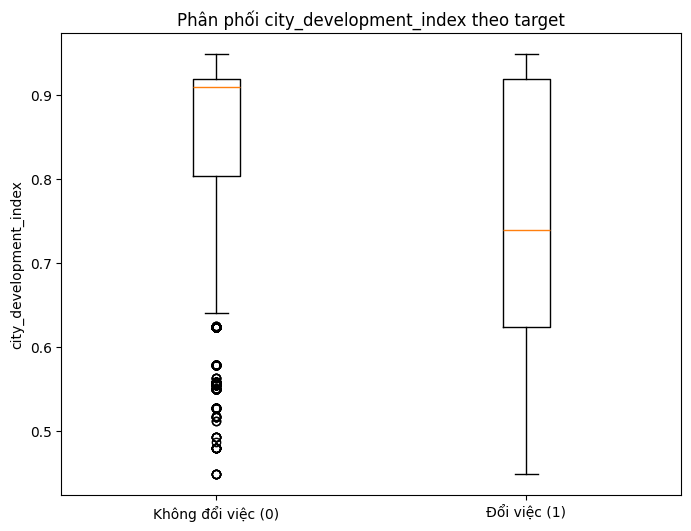

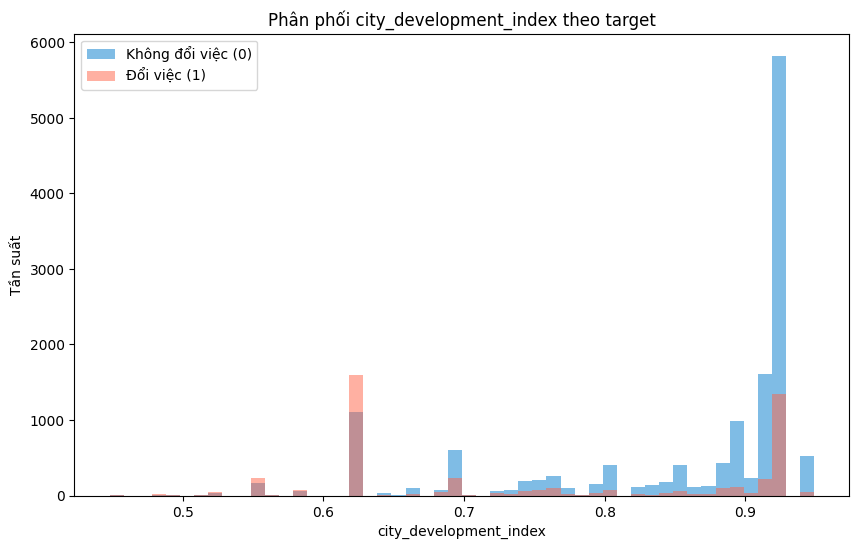

In [9]:
# So sánh city_development_index giữa 2 nhóm target
cdi_idx = header.index('city_development_index')
target_idx = header.index('target')

cdi_col = data[:, cdi_idx].astype(float)
target_col = data[:, target_idx].astype(float).astype(int)

# Phân chia theo target
cdi_target_0 = cdi_col[target_col == 0]
cdi_target_1 = cdi_col[target_col == 1]

print(">> So sánh city_development_index giữa 2 nhóm target")
print(f"\nTarget = 0 (Không đổi việc):")
print(f"  Mean: {np.mean(cdi_target_0):.4f}")
print(f"  Median: {np.median(cdi_target_0):.4f}")
print(f"  Std: {np.std(cdi_target_0):.4f}")

print(f"\nTarget = 1 (Đổi việc):")
print(f"  Mean: {np.mean(cdi_target_1):.4f}")
print(f"  Median: {np.median(cdi_target_1):.4f}")
print(f"  Std: {np.std(cdi_target_1):.4f}")

# Vẽ boxplot so sánh
plt.figure(figsize=(8, 6))
plt.boxplot([cdi_target_0, cdi_target_1], 
            labels=['Không đổi việc (0)', 'Đổi việc (1)'])
plt.ylabel("city_development_index")
plt.title("Phân phối city_development_index theo target")
plt.show()

# Vẽ histogram so sánh
plt.figure(figsize=(10, 6))
plt.hist(cdi_target_0, bins=50, alpha=0.5, label='Không đổi việc (0)', color='#007acc')
plt.hist(cdi_target_1, bins=50, alpha=0.5, label='Đổi việc (1)', color='#ff6347')
plt.xlabel("city_development_index")
plt.ylabel("Tần suất")
plt.title("Phân phối city_development_index theo target")
plt.legend()
plt.show()


Kết Luận:

Ứng viên sống ở các thành phố có mức độ phát triển thấp hơn (CDI thấp) có xu hướng cao hơn muốn đổi công việc, trong khi những người ở thành phố phát triển (CDI cao) ít đổi việc hơn hẳn.

## 9. Câu hỏi phân tích 1: Kinh nghiệm làm việc có ảnh hưởng đến quyết định đổi việc không?


PHÂN TÍCH: KINH NGHIỆM LÀM VIỆC VÀ QUYẾT ĐỊNH ĐỔI VIỆC

Nhóm 0-2 năm kinh nghiệm:
  - Số lượng: 1,071
  - Tỷ lệ đổi việc: 43.88%

Nhóm 2-5 năm kinh nghiệm:
  - Số lượng: 3,884
  - Tỷ lệ đổi việc: 33.70%

Nhóm 5-10 năm kinh nghiệm:
  - Số lượng: 5,456
  - Tỷ lệ đổi việc: 26.87%

Nhóm 10-15 năm kinh nghiệm:
  - Số lượng: 3,128
  - Tỷ lệ đổi việc: 20.27%

Nhóm 15-20 năm kinh nghiệm:
  - Số lượng: 2,120
  - Tỷ lệ đổi việc: 15.99%

Nhóm 20+ năm kinh nghiệm:
  - Số lượng: 3,434
  - Tỷ lệ đổi việc: 15.61%


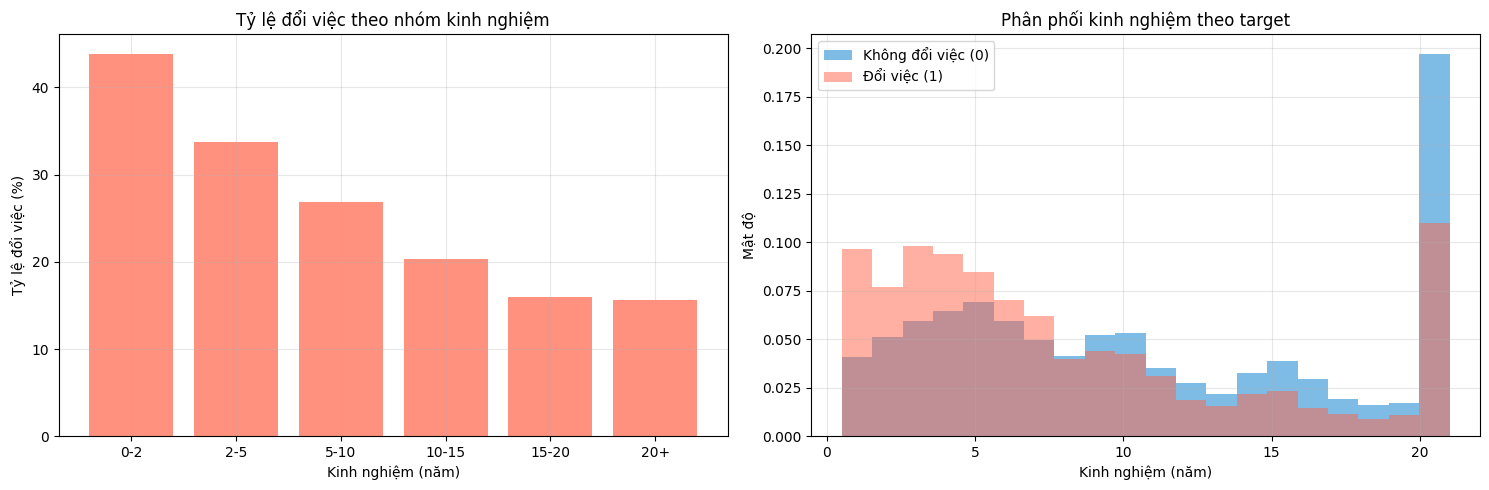

In [10]:
# Phân tích mối quan hệ giữa experience và target
exp_idx = header.index('experience')
target_idx = header.index('target')

exp_col = data[:, exp_idx].copy()
target_col = data[:, target_idx].astype(float).astype(int)

# Xử lý experience column
exp_col[exp_col == '>20'] = '21'
exp_col[exp_col == '<1'] = '0.5'
exp_col[exp_col == 'never'] = '0'
exp_col[exp_col == ''] = 'nan'
exp_col_float = exp_col.astype(float)

# Loại bỏ missing values
valid_mask = ~np.isnan(exp_col_float)
exp_valid = exp_col_float[valid_mask]
target_valid = target_col[valid_mask]

# Phân chia theo nhóm experience
exp_bins = [0, 2, 5, 10, 15, 20, 21]
exp_labels = ['0-2', '2-5', '5-10', '10-15', '15-20', '20+']
exp_groups = np.digitize(exp_valid, bins=exp_bins) - 1
exp_groups[exp_groups < 0] = 0
exp_groups[exp_groups >= len(exp_labels)] = len(exp_labels) - 1

print("=" * 60)
print("PHÂN TÍCH: KINH NGHIỆM LÀM VIỆC VÀ QUYẾT ĐỊNH ĐỔI VIỆC")
print("=" * 60)

# Tính tỷ lệ đổi việc theo nhóm experience
for i, label in enumerate(exp_labels):
    group_mask = exp_groups == i
    if np.sum(group_mask) > 0:
        group_target = target_valid[group_mask]
        change_rate = np.mean(group_target == 1) * 100
        print(f"\nNhóm {label} năm kinh nghiệm:")
        print(f"  - Số lượng: {np.sum(group_mask):,}")
        print(f"  - Tỷ lệ đổi việc: {change_rate:.2f}%")

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart tỷ lệ đổi việc theo nhóm
change_rates = []
group_counts = []
for i, label in enumerate(exp_labels):
    group_mask = exp_groups == i
    if np.sum(group_mask) > 0:
        group_target = target_valid[group_mask]
        change_rate = np.mean(group_target == 1) * 100
        change_rates.append(change_rate)
        group_counts.append(np.sum(group_mask))

ax1.bar(exp_labels[:len(change_rates)], change_rates, color='#ff6347', alpha=0.7)
ax1.set_xlabel('Kinh nghiệm (năm)')
ax1.set_ylabel('Tỷ lệ đổi việc (%)')
ax1.set_title('Tỷ lệ đổi việc theo nhóm kinh nghiệm')
ax1.grid(True, alpha=0.3)

# Histogram so sánh experience giữa 2 nhóm target
exp_target_0 = exp_valid[target_valid == 0]
exp_target_1 = exp_valid[target_valid == 1]

ax2.hist(exp_target_0, bins=20, alpha=0.5, label='Không đổi việc (0)', color='#007acc', density=True)
ax2.hist(exp_target_1, bins=20, alpha=0.5, label='Đổi việc (1)', color='#ff6347', density=True)
ax2.set_xlabel('Kinh nghiệm (năm)')
ax2.set_ylabel('Mật độ')
ax2.set_title('Phân phối kinh nghiệm theo target')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

NHẬN ĐỊNH:

Dựa trên phân tích trên, chúng ta có thể thấy:
1. Kinh nghiệm làm việc có mối quan hệ mạnh với quyết định đổi việc
2. Những người có kinh nghiệm ít có xu hướng đổi việc cao hơn so với những người có kinh nghiệm nhiều

## 10. Câu hỏi phân tích 2: Trình độ học vấn có ảnh hưởng đến quyết định đổi việc không?


PHÂN TÍCH: TRÌNH ĐỘ HỌC VẤN VÀ QUYẾT ĐỊNH ĐỔI VIỆC

Graduate:
  - Số lượng: 11,598
  - Tỷ lệ đổi việc: 27.98%

High School:
  - Số lượng: 2,017
  - Tỷ lệ đổi việc: 19.53%

Masters:
  - Số lượng: 4,361
  - Tỷ lệ đổi việc: 21.44%

Phd:
  - Số lượng: 414
  - Tỷ lệ đổi việc: 14.01%

Primary School:
  - Số lượng: 308
  - Tỷ lệ đổi việc: 13.31%


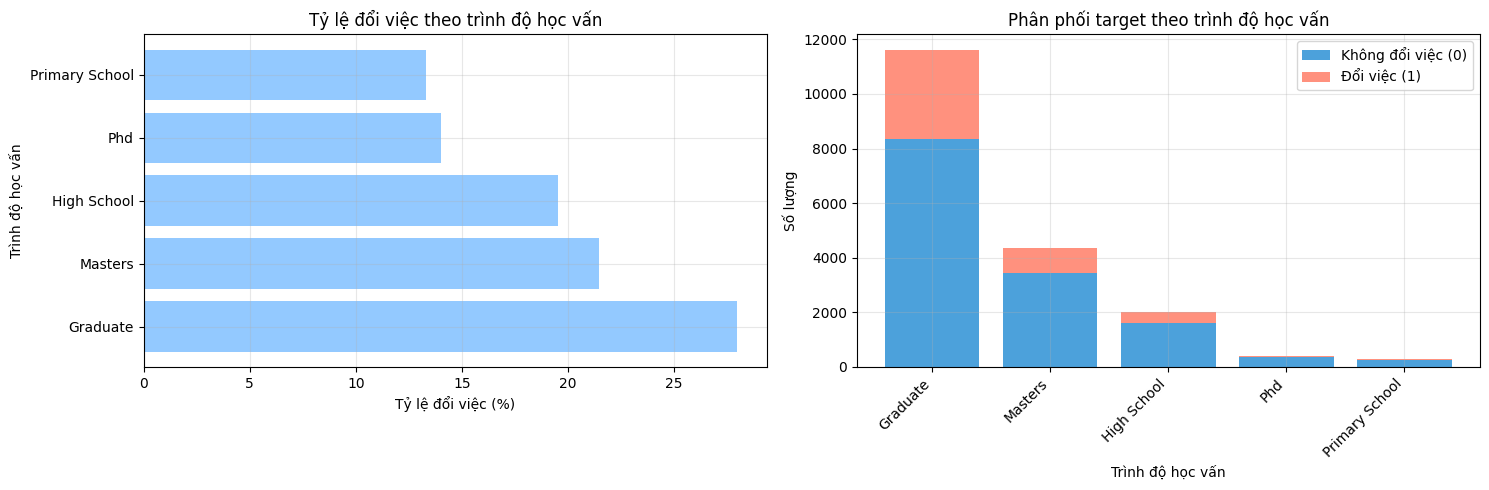

In [11]:
# Phân tích mối quan hệ giữa education_level và target
edu_idx = header.index('education_level')
target_idx = header.index('target')

edu_col = data[:, edu_idx]
target_col = data[:, target_idx].astype(float).astype(int)

# Loại bỏ missing values
valid_mask = edu_col != ''
edu_valid = edu_col[valid_mask]
target_valid = target_col[valid_mask]

# Tính tỷ lệ đổi việc theo education level
unique_edu = np.unique(edu_valid)
edu_change_rates = {}
edu_counts = {}

print("=" * 60)
print("PHÂN TÍCH: TRÌNH ĐỘ HỌC VẤN VÀ QUYẾT ĐỊNH ĐỔI VIỆC")
print("=" * 60)

for edu in unique_edu:
    edu_mask = edu_valid == edu
    edu_target = target_valid[edu_mask]
    change_rate = np.mean(edu_target == 1) * 100
    count = np.sum(edu_mask)
    edu_change_rates[edu] = change_rate
    edu_counts[edu] = count
    print(f"\n{edu}:")
    print(f"  - Số lượng: {count:,}")
    print(f"  - Tỷ lệ đổi việc: {change_rate:.2f}%")

# Sắp xếp theo tỷ lệ đổi việc
sorted_edu = sorted(edu_change_rates.items(), key=lambda x: x[1], reverse=True)
edu_names = [x[0] for x in sorted_edu]
rates = [x[1] for x in sorted_edu]

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart tỷ lệ đổi việc
ax1.barh(edu_names, rates, color='#66b3ff', alpha=0.7)
ax1.set_xlabel('Tỷ lệ đổi việc (%)')
ax1.set_ylabel('Trình độ học vấn')
ax1.set_title('Tỷ lệ đổi việc theo trình độ học vấn')
ax1.grid(True, alpha=0.3)

# Stacked bar chart
edu_names_ordered = list(edu_names)
counts_0 = [np.sum((edu_valid == edu) & (target_valid == 0)) for edu in edu_names_ordered]
counts_1 = [np.sum((edu_valid == edu) & (target_valid == 1)) for edu in edu_names_ordered]

x_pos = np.arange(len(edu_names_ordered))
ax2.bar(x_pos, counts_0, label='Không đổi việc (0)', color='#007acc', alpha=0.7)
ax2.bar(x_pos, counts_1, bottom=counts_0, label='Đổi việc (1)', color='#ff6347', alpha=0.7)
ax2.set_xlabel('Trình độ học vấn')
ax2.set_ylabel('Số lượng')
ax2.set_title('Phân phối target theo trình độ học vấn')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(edu_names_ordered, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


NHẬN ĐỊNH:


Dựa trên phân tích trên, chúng ta có thể thấy:
1. Trình độ học vấn có ảnh hưởng đến quyết định đổi việc
2. Nhóm có tỷ lệ đổi việc cao nhất: Graduate (27.98%)
3. Nhóm có tỷ lệ đổi việc thấp nhất: Primary School (13.31%)
4. Những lao động tốt nghiệp đại học có xu hướng nhảy việc cao hơn các nhóm khác.
5. PhD và Primary có tỷ lệ đổi việc thấp nhất, cho thấy những người có trình độ rất cao hoặc rất thấp thường ít thay đổi công việc.

## 11. Câu hỏi phân tích 3: Thành phố phát triển có ảnh hưởng đến các yếu tố khác như thế nào?


PHÂN TÍCH: CITY DEVELOPMENT INDEX VÀ CÁC YẾU TỐ KHÁC

1. Tỷ lệ đổi việc theo mức độ phát triển thành phố:
   Thấp (<0.76): 43.90% (n=6,141)
   Trung bình (0.76-0.87): 13.05% (n=5,280)
   Cao (>=0.87): 17.99% (n=7,737)

2. Training hours trung bình theo mức độ phát triển thành phố:
   Thấp (<0.76): 64.94 giờ
   Trung bình (0.76-0.87): 65.56 giờ
   Cao (>=0.87): 65.58 giờ

3. Kinh nghiệm trung bình theo mức độ phát triển thành phố:
   Thấp (<0.76): 7.05 năm
   Trung bình (0.76-0.87): 11.07 năm
   Cao (>=0.87): 11.88 năm


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23816\1555497186.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([cdi_target_0, cdi_target_1], labels=['Không đổi việc', 'Đổi việc'])


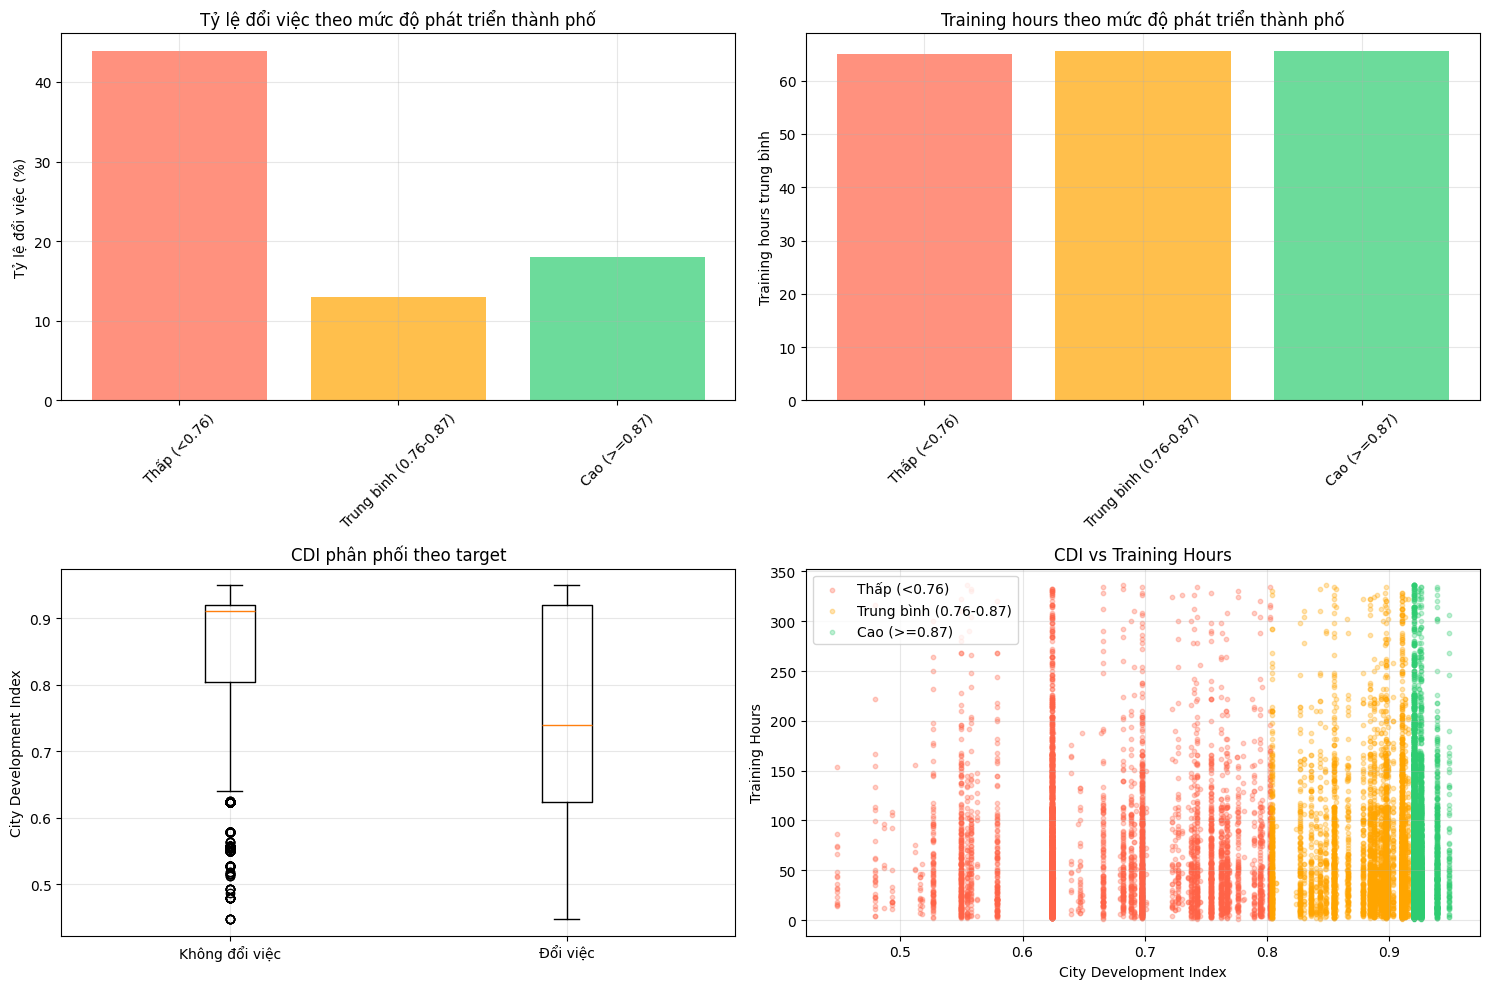

In [12]:
# Phân tích mối quan hệ giữa city_development_index và các biến khác
cdi_idx = header.index('city_development_index')
cdi = data[:, cdi_idx].astype(float)

# Chia thành 3 nhóm: thấp, trung bình, cao
cdi_low = cdi < np.percentile(cdi, 33)
cdi_medium = (cdi >= np.percentile(cdi, 33)) & (cdi < np.percentile(cdi, 67))
cdi_high = cdi >= np.percentile(cdi, 67)

cdi_groups = np.zeros(len(cdi), dtype=int)
cdi_groups[cdi_low] = 0
cdi_groups[cdi_medium] = 1
cdi_groups[cdi_high] = 2

group_names = ['Thấp (<0.76)', 'Trung bình (0.76-0.87)', 'Cao (>=0.87)']

print("=" * 60)
print("PHÂN TÍCH: CITY DEVELOPMENT INDEX VÀ CÁC YẾU TỐ KHÁC")
print("=" * 60)

# 1. Phân tích target
target_idx = header.index('target')
target_col = data[:, target_idx].astype(float).astype(int)

print("\n1. Tỷ lệ đổi việc theo mức độ phát triển thành phố:")
for i, name in enumerate(group_names):
    group_mask = cdi_groups == i
    group_target = target_col[group_mask]
    change_rate = np.mean(group_target == 1) * 100
    print(f"   {name}: {change_rate:.2f}% (n={np.sum(group_mask):,})")

# 2. Phân tích training_hours
training_idx = header.index('training_hours')
training_col = data[:, training_idx].astype(float)

print("\n2. Training hours trung bình theo mức độ phát triển thành phố:")
for i, name in enumerate(group_names):
    group_mask = cdi_groups == i
    group_training = training_col[group_mask]
    mean_training = np.mean(group_training)
    print(f"   {name}: {mean_training:.2f} giờ")

# 3. Phân tích experience
exp_idx = header.index('experience')
exp_col = data[:, exp_idx].copy()
exp_col[exp_col == '>20'] = '21'
exp_col[exp_col == '<1'] = '0.5'
exp_col[exp_col == 'never'] = '0'
exp_col[exp_col == ''] = 'nan'
exp_col_float = exp_col.astype(float)

valid_exp_mask = ~np.isnan(exp_col_float)
exp_valid = exp_col_float[valid_exp_mask]
cdi_groups_valid = cdi_groups[valid_exp_mask]

print("\n3. Kinh nghiệm trung bình theo mức độ phát triển thành phố:")
for i, name in enumerate(group_names):
    group_mask = cdi_groups_valid == i
    if np.sum(group_mask) > 0:
        group_exp = exp_valid[group_mask]
        mean_exp = np.nanmean(group_exp)
        print(f"   {name}: {mean_exp:.2f} năm")

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Tỷ lệ đổi việc
change_rates = [np.mean(target_col[cdi_groups == i] == 1) * 100 for i in range(3)]
axes[0, 0].bar(group_names, change_rates, color=['#ff6347', '#ffa500', '#2ecc71'], alpha=0.7)
axes[0, 0].set_ylabel('Tỷ lệ đổi việc (%)')
axes[0, 0].set_title('Tỷ lệ đổi việc theo mức độ phát triển thành phố')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Training hours
mean_training = [np.mean(training_col[cdi_groups == i]) for i in range(3)]
axes[0, 1].bar(group_names, mean_training, color=['#ff6347', '#ffa500', '#2ecc71'], alpha=0.7)
axes[0, 1].set_ylabel('Training hours trung bình')
axes[0, 1].set_title('Training hours theo mức độ phát triển thành phố')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Boxplot CDI theo target
cdi_target_0 = cdi[target_col == 0]
cdi_target_1 = cdi[target_col == 1]
axes[1, 0].boxplot([cdi_target_0, cdi_target_1], labels=['Không đổi việc', 'Đổi việc'])
axes[1, 0].set_ylabel('City Development Index')
axes[1, 0].set_title('CDI phân phối theo target')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scatter plot CDI vs Training hours
colors = ['#ff6347', '#ffa500', '#2ecc71']
for i in range(3):
    mask = cdi_groups == i
    axes[1, 1].scatter(cdi[mask], training_col[mask], alpha=0.3, 
                      label=group_names[i], color=colors[i], s=10)
axes[1, 1].set_xlabel('City Development Index')
axes[1, 1].set_ylabel('Training Hours')
axes[1, 1].set_title('CDI vs Training Hours')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


NHẬN ĐỊNH:

Dựa trên phân tích trên, chúng ta có thể thấy:
1. City Development Index có mối quan hệ chặt chẽ với tỷ lệ đổi việc. Ứng viên ở những thành phố kém phát triển có khả năng
rời bỏ công việc cao hơn, có thể do ít cơ hội nghề nghiệp, thiếu môi trường phù hợp hoặc mong muốn chuyển đến nơi tốt hơn.

2. Số giờ đào tạo trung bình khá tương đồng giữa các nhóm CDI (khoảng 65–66 giờ).
Mức độ phát triển thành phố không ảnh hưởng đáng kể đến việc ứng viên được đào tạo nhiều hay ít.
Có thể nói rằng “training_hours” không phải yếu tố mạnh trong việc giải thích hành vi đổi việc.

3. Boxplot cho thấy CDI của nhóm “không đổi việc” cao hơn rõ rệt.
Nhóm “đổi việc” có phân phối trải rộng hơn, nhiều giá trị CDI thấp.
      Điều này cho thấy rằng những người sống ở môi trường phát triển hơn có xu hướng gắn bó với công việc hơn.
      
4. Không có mối tương quan rõ ràng giữa training_hours và CDI.
Các điểm dữ liệu ở nhóm CDI thấp, trung bình và cao chồng lên nhau về training_hours.
      training_hours không phải feature mạnh trong mô hình dự đoán

## 12. Câu hỏi phân tích 4: Có mối tương quan nào giữa các biến số không?


PHÂN TÍCH TƯƠNG QUAN GIỮA CÁC BIẾN SỐ

Ma trận tương quan:
                           CDI Training Hours     Experience         Target
CDI                     1.0000         0.0027         0.3335        -0.3418
Training Hours          0.0027         1.0000         0.0008        -0.0219
Experience              0.3335         0.0008         1.0000        -0.1763
Target                 -0.3418        -0.0219        -0.1763         1.0000


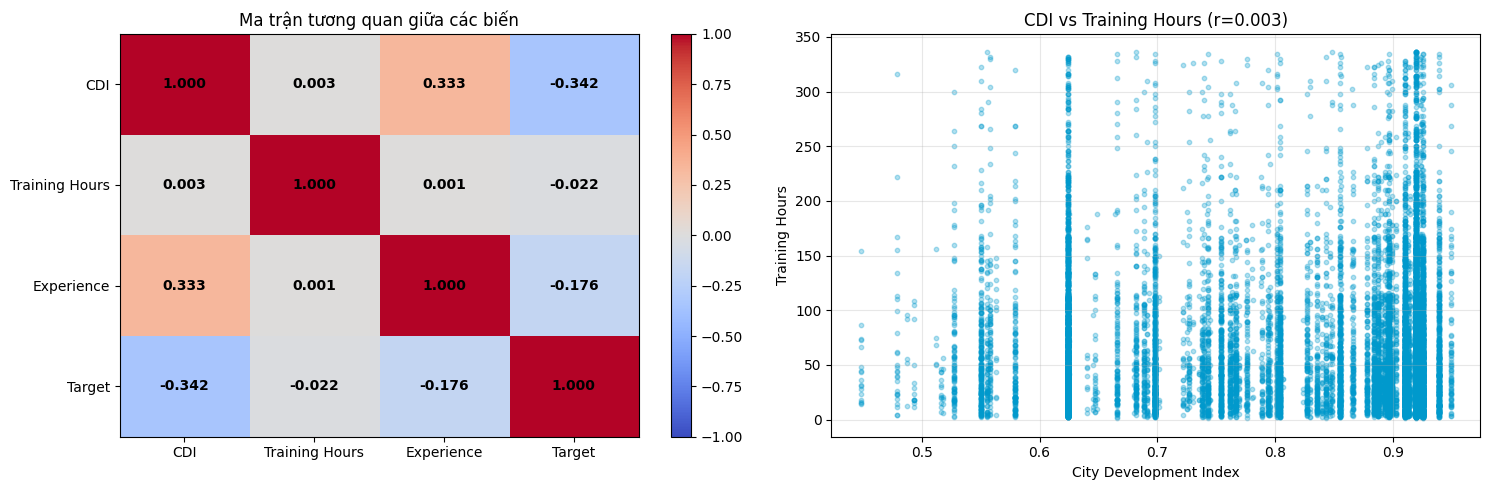

In [13]:
# Phân tích tương quan giữa các biến số
# Lấy các cột numeric
cdi_idx = header.index('city_development_index')
training_idx = header.index('training_hours')
exp_idx = header.index('experience')
target_idx = header.index('target')

cdi = data[:, cdi_idx].astype(float)
training = data[:, training_idx].astype(float)
exp_col = data[:, exp_idx].copy()
exp_col[exp_col == '>20'] = '21'
exp_col[exp_col == '<1'] = '0.5'
exp_col[exp_col == 'never'] = '0'
exp_col[exp_col == ''] = 'nan'
experience = exp_col.astype(float)
target = data[:, target_idx].astype(float).astype(int)

# Loại bỏ missing values
valid_mask = ~(np.isnan(cdi) | np.isnan(training) | np.isnan(experience))
cdi_valid = cdi[valid_mask]
training_valid = training[valid_mask]
exp_valid = experience[valid_mask]
target_valid = target[valid_mask]

print("=" * 60)
print("PHÂN TÍCH TƯƠNG QUAN GIỮA CÁC BIẾN SỐ")
print("=" * 60)

# Tính correlation matrix
numeric_data = np.column_stack([cdi_valid, training_valid, exp_valid, target_valid])
corr_matrix = np.corrcoef(numeric_data.T)

# Tên các biến
var_names = ['CDI', 'Training Hours', 'Experience', 'Target']

print("\nMa trận tương quan:")
print(" " * 15, end="")
for name in var_names:
    print(f"{name:>15s}", end="")
print()

for i, name in enumerate(var_names):
    print(f"{name:15s}", end="")
    for j in range(len(var_names)):
        print(f"{corr_matrix[i, j]:15.4f}", end="")
    print()

# Vẽ heatmap correlation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap
im = axes[0].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[0].set_xticks(range(len(var_names)))
axes[0].set_yticks(range(len(var_names)))
axes[0].set_xticklabels(var_names)
axes[0].set_yticklabels(var_names)
axes[0].set_title('Ma trận tương quan giữa các biến')

# Thêm giá trị vào heatmap
for i in range(len(var_names)):
    for j in range(len(var_names)):
        text = axes[0].text(j, i, f'{corr_matrix[i, j]:.3f}',
                           ha="center", va="center", color="black", fontsize=10, fontweight='bold')

plt.colorbar(im, ax=axes[0])

# Scatter plots
# CDI vs Training Hours
axes[1].scatter(cdi_valid, training_valid, alpha=0.3, s=10, color='#0099cc')
axes[1].set_xlabel('City Development Index')
axes[1].set_ylabel('Training Hours')
axes[1].set_title(f'CDI vs Training Hours (r={corr_matrix[0,1]:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

NHẬN ĐỊNH VÀ KHUYẾN NGHỊ:

1. City Development Index là biến có tương quan mạnh nhất với target
2. Training hours và experience có tương quan yếu với target
3. Các biến độc lập không có tương quan quá cao với nhau (multicollinearity không đáng lo)
4. Nên sử dụng cả 3 biến trong mô hình dự đoán
5. Có thể tạo thêm features tương tác giữa CDI và các biến khác để cải thiện mô hình

## 13. Câu hỏi phân tích 5: Company size có ảnh hưởng đến quyết định nghỉ việc không ?

PHÂN TÍCH: QUY MÔ CÔNG TY VÀ QUYẾT ĐỊNH ĐỔI VIỆC

10/49:
  - Số lượng: 1,471
  - Tỷ lệ đổi việc: 23.39%

100-500:
  - Số lượng: 2,571
  - Tỷ lệ đổi việc: 16.14%

1000-4999:
  - Số lượng: 1,328
  - Tỷ lệ đổi việc: 15.06%

10000+:
  - Số lượng: 2,019
  - Tỷ lệ đổi việc: 19.07%

50-99:
  - Số lượng: 3,083
  - Tỷ lệ đổi việc: 17.68%

500-999:
  - Số lượng: 877
  - Tỷ lệ đổi việc: 17.33%

5000-9999:
  - Số lượng: 563
  - Tỷ lệ đổi việc: 18.12%

<10:
  - Số lượng: 1,308
  - Tỷ lệ đổi việc: 17.13%


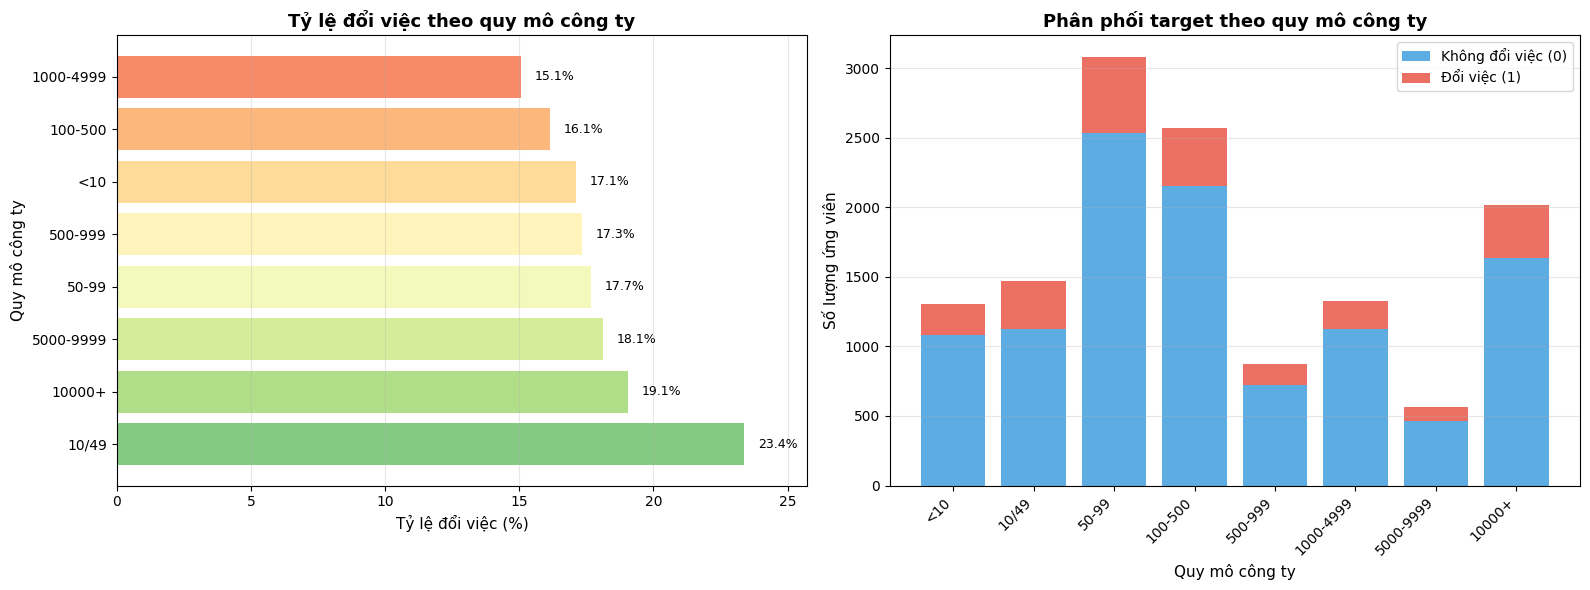


PHÂN TÍCH THEO NHÓM QUY MÔ:

Công ty nhỏ (<50 nhân viên):
  - Số lượng: 2,779
  - Tỷ lệ đổi việc: 20.44%

Công ty trung bình (50-999 nhân viên):
  - Số lượng: 6,531
  - Tỷ lệ đổi việc: 17.03%

Công ty lớn (≥1000 nhân viên):
  - Số lượng: 3,910
  - Tỷ lệ đổi việc: 17.57%


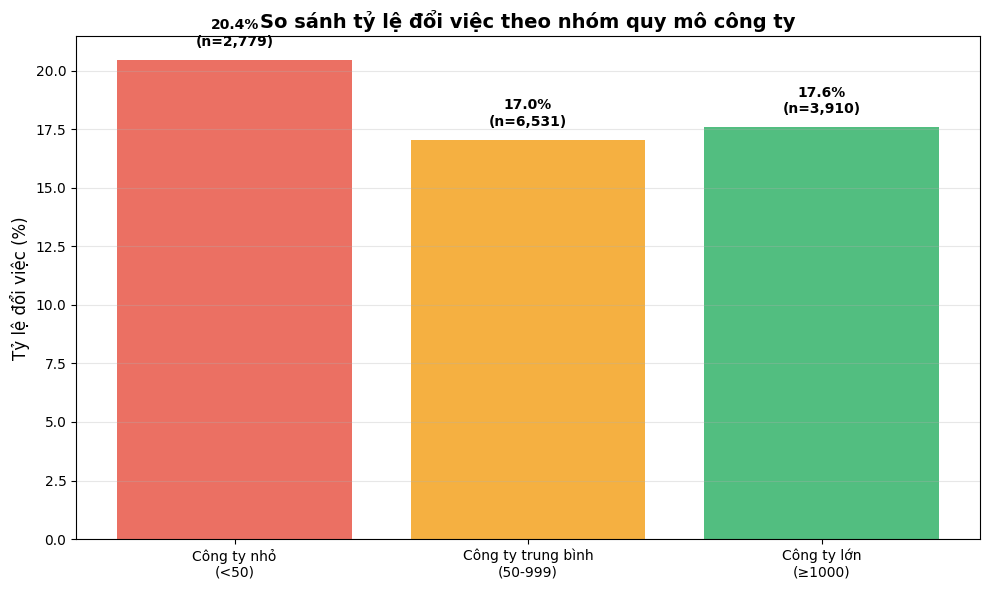

In [14]:
# Phân tích mối quan hệ giữa company_size và target
company_size_idx = header.index('company_size')
target_idx = header.index('target')

company_size_col = data[:, company_size_idx]
target_col = data[:, target_idx].astype(float).astype(int)

# Loại bỏ missing values
valid_mask = company_size_col != ''
company_size_valid = company_size_col[valid_mask]
target_valid = target_col[valid_mask]

# Tính tỷ lệ đổi việc theo company size
unique_sizes = np.unique(company_size_valid)
size_change_rates = {}
size_counts = {}

print("=" * 60)
print("PHÂN TÍCH: QUY MÔ CÔNG TY VÀ QUYẾT ĐỊNH ĐỔI VIỆC")
print("=" * 60)

for size in unique_sizes:
    size_mask = company_size_valid == size
    size_target = target_valid[size_mask]
    change_rate = np.mean(size_target == 1) * 100
    count = np.sum(size_mask)
    size_change_rates[size] = change_rate
    size_counts[size] = count
    print(f"\n{size}:")
    print(f"  - Số lượng: {count:,}")
    print(f"  - Tỷ lệ đổi việc: {change_rate:.2f}%")

# Sắp xếp theo tỷ lệ đổi việc giảm dần
sorted_sizes = sorted(size_change_rates.items(), key=lambda x: x[1], reverse=True)
size_names = [x[0] for x in sorted_sizes]
rates = [x[1] for x in sorted_sizes]

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Bar chart tỷ lệ đổi việc theo company size
colors_gradient = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(size_names)))
ax1.barh(size_names, rates, color=colors_gradient, alpha=0.8)
ax1.set_xlabel('Tỷ lệ đổi việc (%)', fontsize=11)
ax1.set_ylabel('Quy mô công ty', fontsize=11)
ax1.set_title('Tỷ lệ đổi việc theo quy mô công ty', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')
ax1.set_xlim(0, max(rates) * 1.1)

# Thêm nhãn giá trị
for i, (name, rate) in enumerate(zip(size_names, rates)):
    ax1.text(rate + 0.5, i, f'{rate:.1f}%', va='center', fontsize=9)

# 2. Stacked bar chart phân phối target theo company size
# Sắp xếp lại theo thứ tự quy mô
size_order_map = {
    '<10': 0, '10/49': 1, '50-99': 2, '100-500': 3, 
    '500-999': 4, '1000-4999': 5, '5000-9999': 6, '10000+': 7
}

# Lọc và sắp xếp các size có trong data
available_sizes = [s for s in size_order_map.keys() if s in unique_sizes]
available_sizes.sort(key=lambda x: size_order_map.get(x, 999))

counts_0 = [np.sum((company_size_valid == size) & (target_valid == 0)) for size in available_sizes]
counts_1 = [np.sum((company_size_valid == size) & (target_valid == 1)) for size in available_sizes]

x_pos = np.arange(len(available_sizes))
bar1 = ax2.bar(x_pos, counts_0, label='Không đổi việc (0)', color='#3498db', alpha=0.8)
bar2 = ax2.bar(x_pos, counts_1, bottom=counts_0, label='Đổi việc (1)', color='#e74c3c', alpha=0.8)

ax2.set_xlabel('Quy mô công ty', fontsize=11)
ax2.set_ylabel('Số lượng ứng viên', fontsize=11)
ax2.set_title('Phân phối target theo quy mô công ty', fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(available_sizes, rotation=45, ha='right')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Phân tích theo nhóm quy mô
print("\n" + "=" * 60)
print("PHÂN TÍCH THEO NHÓM QUY MÔ:")
print("=" * 60)

# Nhóm công ty nhỏ
small_companies = ['<10', '10/49']
small_mask = np.isin(company_size_valid, small_companies)
if np.sum(small_mask) > 0:
    small_change_rate = np.mean(target_valid[small_mask] == 1) * 100
    print(f"\nCông ty nhỏ (<50 nhân viên):")
    print(f"  - Số lượng: {np.sum(small_mask):,}")
    print(f"  - Tỷ lệ đổi việc: {small_change_rate:.2f}%")

# Nhóm công ty trung bình
medium_companies = ['50-99', '100-500', '500-999']
medium_mask = np.isin(company_size_valid, medium_companies)
if np.sum(medium_mask) > 0:
    medium_change_rate = np.mean(target_valid[medium_mask] == 1) * 100
    print(f"\nCông ty trung bình (50-999 nhân viên):")
    print(f"  - Số lượng: {np.sum(medium_mask):,}")
    print(f"  - Tỷ lệ đổi việc: {medium_change_rate:.2f}%")

# Nhóm công ty lớn
large_companies = ['1000-4999', '5000-9999', '10000+']
large_mask = np.isin(company_size_valid, large_companies)
if np.sum(large_mask) > 0:
    large_change_rate = np.mean(target_valid[large_mask] == 1) * 100
    print(f"\nCông ty lớn (≥1000 nhân viên):")
    print(f"  - Số lượng: {np.sum(large_mask):,}")
    print(f"  - Tỷ lệ đổi việc: {large_change_rate:.2f}%")

# Vẽ biểu đồ so sánh 3 nhóm
fig, ax = plt.subplots(figsize=(10, 6))

group_names = ['Công ty nhỏ\n(<50)', 'Công ty trung bình\n(50-999)', 'Công ty lớn\n(≥1000)']
group_rates = []
group_counts = []

if np.sum(small_mask) > 0:
    group_rates.append(small_change_rate)
    group_counts.append(np.sum(small_mask))
if np.sum(medium_mask) > 0:
    group_rates.append(medium_change_rate)
    group_counts.append(np.sum(medium_mask))
if np.sum(large_mask) > 0:
    group_rates.append(large_change_rate)
    group_counts.append(np.sum(large_mask))

colors = ['#e74c3c', '#f39c12', '#27ae60']
bars = ax.bar(group_names[:len(group_rates)], group_rates, color=colors[:len(group_rates)], alpha=0.8)

ax.set_ylabel('Tỷ lệ đổi việc (%)', fontsize=12)
ax.set_title('So sánh tỷ lệ đổi việc theo nhóm quy mô công ty', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Thêm nhãn giá trị và số lượng
for i, (bar, rate, count) in enumerate(zip(bars, group_rates, group_counts)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{rate:.1f}%\n(n={count:,})',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

NHẬN ĐỊNH VÀ KẾT LUẬN:

1. QUY MÔ CÔNG TY CÓ ẢNH HƯỞNG RÕ RỆT ĐẾN QUYẾT ĐỊNH ĐỔI VIỆC

2. Công ty nhỏ có tỷ lệ đổi việc cao nhất (20.44%)
   → Lý do có thể:
     - Ít cơ hội thăng tiến và phát triển nghề nghiệp
     - Lương thưởng và phúc lợi không cạnh tranh
     - Môi trường làm việc kém ổn định
     - Thiếu quy trình và hệ thống quản lý chuyên nghiệp

3. Công ty lớn có tỷ lệ đổi việc thấp nhất (17.57%)
   → Lý do có thể:
     - Lương thưởng và phúc lợi tốt hơn
     - Nhiều cơ hội thăng tiến và đào tạo
     - Môi trường làm việc ổn định và chuyên nghiệp
     - Thương hiệu và uy tín công ty

4. Khuyến nghị cho mô hình dự đoán:
   - Company_size là một feature quan trọng nên đưa vào mô hình
   - Có thể kết hợp với các feature khác (CDI, experience) để tăng độ chính xác